# Case Study

## Setup

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import decomposition

In [72]:
#Help funcs for colored output
def green(txt):
    return f"\x1b[32m{txt}\x1b[0m"
def red(txt):
    return f"\x1b[31m{txt}\x1b[0m"
def blue(txt):
    return f"\x1b[36m{txt}\x1b[0m"
def bold(txt):
        return f"\x1b[1m{txt}\x1b[0m"

In [73]:
#Get raw Data
df = pd.read_csv("data/house_data_training.csv", sep=';') 
#Deleting row index and id
df = df.iloc[:, 2:]

## Visualisierung 1.0

In [74]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,dis_super,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,ahf1,ahf2,ahf3
count,1.500000e+04,15000.000000,15000.00000,15000.000000,1.500000e+04,15000.000000,14997.000000,14997.000000,14997.000000,14997.000000,...,14997.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,3.328097e+06,3.372400,2.12635,2096.708267,1.469860e+04,1.509533,0.006801,937.559056,0.227646,3.395279,...,1972.397546,77.436533,98076.245733,47.554242,-122.213894,1991.374400,12566.263467,48.617462,104.143663,152.761125
std,1.643430e+07,0.902832,0.76925,984.417205,3.842964e+04,0.545462,0.082192,268.828882,0.755120,0.642622,...,29.545072,385.447294,53.580436,0.140877,0.139778,692.536001,26827.490013,22.174254,13.005133,25.724786
min,1.000000e+04,0.000000,0.00000,370.000000,5.200000e+02,1.000000,0.000000,93.000000,0.000000,1.000000,...,1900.000000,0.000000,98001.000000,47.155900,-122.515000,399.000000,651.000000,10.010585,55.397985,75.072384
25%,3.180000e+05,3.000000,1.75000,1430.000000,5.000000e+03,1.000000,0.000000,757.720000,0.000000,3.000000,...,1953.000000,0.000000,98031.000000,47.458500,-122.326000,1480.000000,5040.000000,29.262797,95.316786,132.916027
50%,4.517775e+05,3.000000,2.25000,1920.000000,7.566000e+03,1.500000,0.000000,936.580000,0.000000,3.000000,...,1977.000000,0.000000,98065.000000,47.566950,-122.234000,1840.000000,7601.000000,48.557508,104.253927,152.870930
75%,6.600000e+05,4.000000,2.50000,2570.000000,1.068575e+04,2.000000,0.000000,1116.120000,0.000000,4.000000,...,1999.000000,0.000000,98117.000000,47.675325,-122.126000,2380.000000,10050.000000,67.847538,112.975883,172.439485
max,1.000000e+08,11.000000,8.00000,17180.000000,1.164794e+06,3.500000,1.000000,1919.340000,4.000000,5.000000,...,2015.000000,2015.000000,98199.000000,47.777600,-121.321000,6210.000000,871200.000000,86.999842,157.639420,229.276426


### Geographische Lage

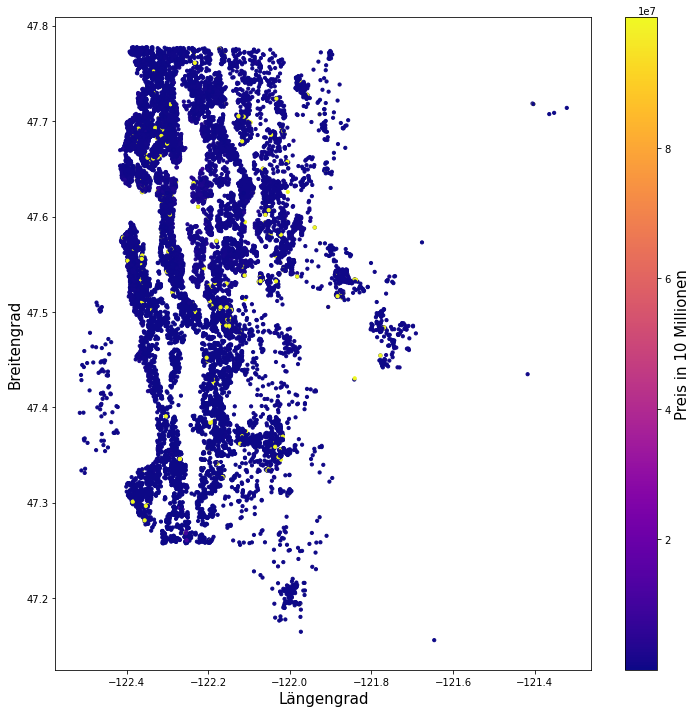

In [75]:
plt.figure(figsize=(12,12))
plt.scatter(df["long"], df["lat"], c=df["price"], cmap="plasma", s=10)
cbar = plt.colorbar()
cbar.set_label("Preis in 10 Millionen", fontsize=15)
plt.xlabel("Längengrad", fontsize=15)
plt.ylabel("Breitengrad", fontsize=15)
plt.show()

### Label & Features

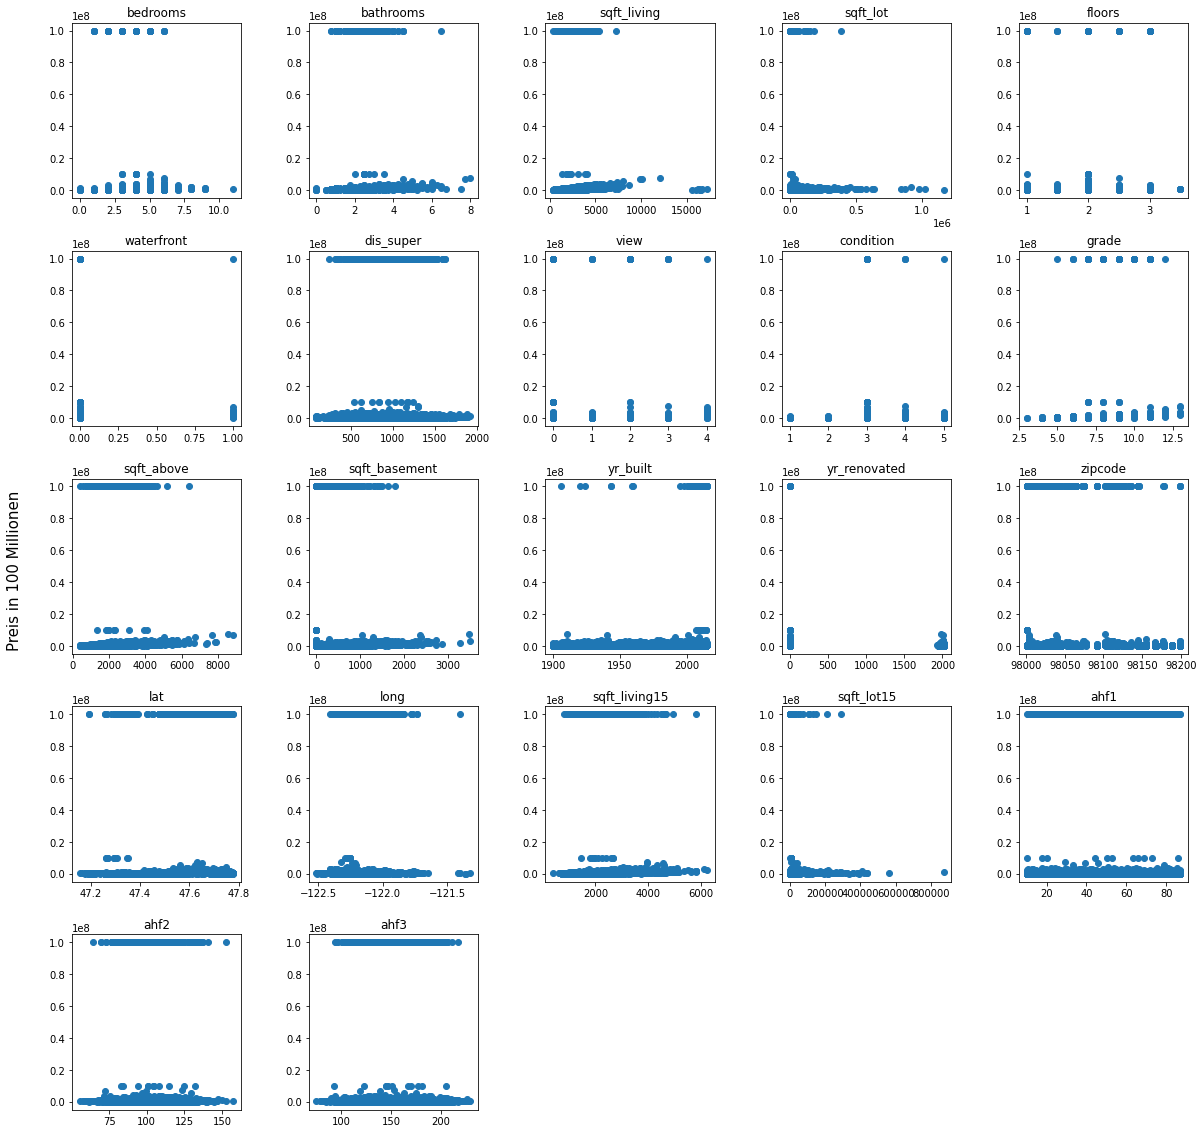

In [76]:
fig, axs=plt.subplots(5,5, figsize=(20,20))
#Y-Title
fig.text(0.08, 0.5, 'Preis in 100 Millionen', va='center', rotation='vertical', fontsize=15)
#All Plots
for i,ax in zip(df.iloc[:,2:],axs.ravel()):
    ax.scatter(df[i],df["price"])
    ax.set_title(i)
#Don't show empty plots
axs[-1,-1].axis("off")
axs[-1,-2].axis("off")
axs[-1,-3].axis("off")
#Spacing
plt.subplots_adjust(wspace=0.4, hspace=0.3)


Zum Preis
NA
viele Null min

## Ausreißer

### Manuelle Betrachtung

Der Preis ist sehr auffällig:


<AxesSubplot:>

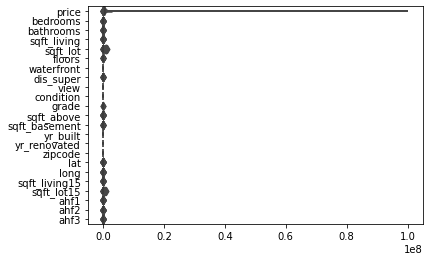

In [77]:
#Visuallisierung von Ausreißern
print("Der Preis ist sehr auffällig:")
sns.boxenplot(data=df,orient="h")

In [78]:
print("Die kleinsten zehn Werte des Features price:")
print(green(np.sort(df.price.unique())[:10]), "\n")

print("Die größten zehn Werte des Features price:")
print(red(np.sort(df.price.unique())[-10:]),"\n")

print("Anzahl Ausreißer mit 99 Millionen: " + blue(str(len(df.loc[df.price == 99999999.0]))))
print("Anzahl Ausreißer mit 9 Millionen: " + blue(str(len(df.loc[df.price == 9999999.9]))))

df = df.loc[df.price != 99999999.0].loc[df.price != 9999999.9]

Die kleinsten zehn Werte des Features price:
[10000. 11500. 12450. 13250. 13900. 13995. 15000. 15400. 15900. 16000.] 

Die größten zehn Werte des Features price:
[ 3850000.   4000000.   4500000.   5300000.   5350000.   6885000.
  7062500.   7700000.   9999999.9 99999999. ] 

Anzahl Ausreißer mit 99 Millionen: 421
Anzahl Ausreißer mit 9 Millionen: 11


#### Visualisierung
Die unten stehende Visualisierung zeigt einige AUffälligkeiten des Datensatzes:
- Viele Features sind auf einen relativ kleinen Bereich konzentriert (z.B. **bathrooms**, **sqft_living**, **grade**)
- Manche Featured sind so stark konzentriert, dass der Großteil der Daten in dieser Grafik auf einem Punkt zu liegen scheint (z.B. **sqft_lot**, **view**, **waterfront**)
- Bei **view**, **yr_renovated** und **waterfront** scheinen fast alle, bei **sqft_basement** zumindest ein großer Teil, der Daten bei 0 zu liegen. Das sollte weiter untersucht werden, da es sich womöglich um falsch gekennzeichnete fehlende Werte handeln könnte.

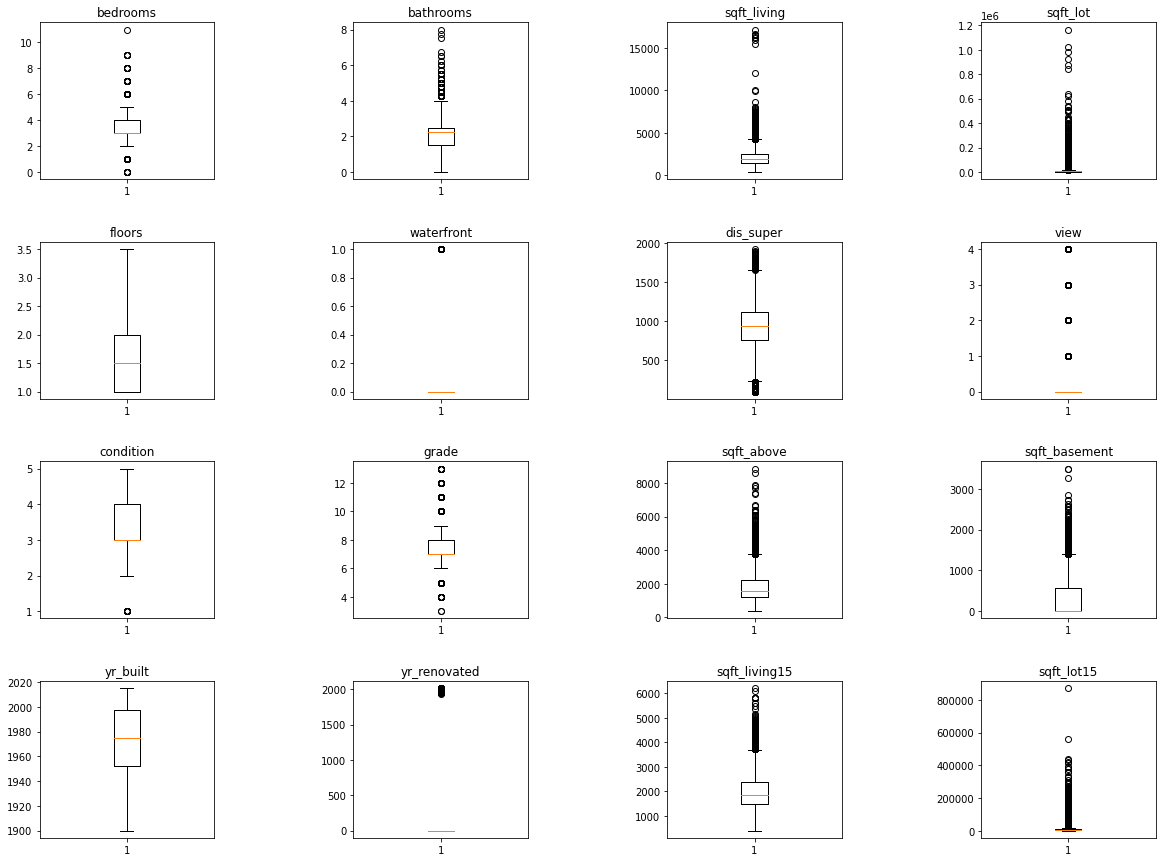

In [79]:
#Visuallisierung von Ausreißern
re_col=['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'dis_super', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15']
       

fig, ax = plt.subplots(4,4, figsize=(20,15))
fig.subplots_adjust(hspace = .4, wspace=0.8)
ax=ax.ravel()

x=0
for i in re_col:
    ax[x].boxplot(df.dropna()[i])
    ax[x].set_title(i)
    x+=1

In [80]:
for i in df.columns:
    all = len(df)
    modus = len(df.loc[df[i] == df[i].mode()[0]])
    percentage = round(modus / all, 4) * 100
    if percentage > 5 and df[i].mode()[0] == 0:
        print(f"{i}:  \n    Der Wert 0 macht {percentage}% aller Werte aus")

waterfront:  
    Der Wert 0 macht 99.29% aller Werte aus
view:  
    Der Wert 0 macht 90.32% aller Werte aus
sqft_basement:  
    Der Wert 0 macht 61.24000000000001% aller Werte aus
yr_renovated:  
    Der Wert 0 macht 96.0% aller Werte aus


Die vier Featurs **waterfront**, **view**, **sqft_basement** und **yr_renovated** enthalten auffällig oft den Wert 0.
  
- Bei **view** könnte der Wert teil der Skala sein.  
- Im Fall von **sqft_basement** würde 0 vermutlich keinen Keller bedeuten.  
- Für **yr_renovated** stellt die 0 einen unrealistischen Wert dar. Sie könnte dennoch eine Information enthalten.  
- **waterfront** hat nur die Werte 0 und 1. Diese Werte wohl für Wahrheitswerte, sprich ob ein Haus eine Wasserfront hat oder nicht. Das würde die 99.31% 0 erklären.  
  
Auch bei **sqft_lot** und **sqft_lot 15** gibt es unnatürlich viele Werte bei 0. Das scheint aber an Ausreißern (siehe weiter unter) und der kleinen Darstellung zu liegen.
  
*Anmerkung: der folgende Teil wurde erst nach der Entfernung der Ausreißer beim Preis ausgeführt*  

##### **view:**
Obwohl die Wertung 0 im Feature **view** unüblich oft auftaucht, scheint sie nicht weiter ungewöhnlich zu sein.  
Der durchschnittliche Preis steigt einigermaßen gleichmäßig von 0 bis 5 an, wie der Barplot weiter unten aufzeigt

<AxesSubplot:xlabel='view', ylabel='price'>

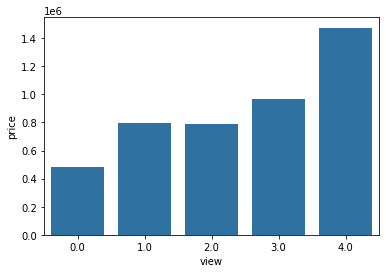

In [81]:
view_df = df.loc[:, ["view", "price"]].groupby("view").mean()
sns.barplot(x=view_df.index, y=view_df.price, color="#1c74b4")

##### **waterfront:**
Die Gebäude mit **waterfront** = 1 sind deutlich mehr Wert. Die 0 steht anscheinend wirklich für keine Wasserfront.

Werte in df.waterfront: [ 0.  1. nan]
Der durchschnittliche Preis bei waterfront = 0: 521284.7
Der durchschnittliche Preis bei waterfront = 1: 1649895.12
Das sind etwa 216.51% mehr.


<AxesSubplot:xlabel='waterfront', ylabel='price'>

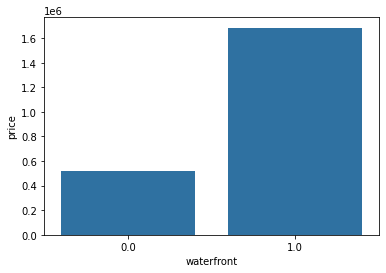

In [83]:
print("Werte in df.waterfront:",df.waterfront.unique())

waterfront_0 = round(df.loc[df.waterfront == 0].price.mean(), 2)
waterfont_1 = round(df.loc[df.waterfront != 0].price.mean(), 2)
difference = round((waterfont_1 / waterfront_0 - 1) * 100, 2) 

print(f"Der durchschnittliche Preis bei waterfront = 0: {waterfront_0}\nDer durchschnittliche Preis bei waterfront = 1: {waterfont_1}\nDas sind etwa {difference}% mehr.")

waterfront_df = df.loc[:, ["waterfront", "price"]].groupby("waterfront").mean()
sns.barplot(x=waterfront_df.index, y=waterfront_df.price, color="#1c74b4")

##### **sqft_basement:**

Der Wert 0 bei **sqft_basement** senkt den Durchschnittspreis etwas im Vergleich zu anderen Werten.  
Insgesamt scheint er aber nicht aus dem Rahmen zu fallen.

<AxesSubplot:>

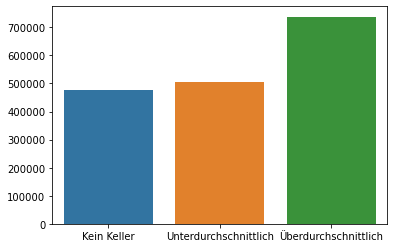

In [13]:
sqft_basement_0 = round(df.loc[df.sqft_basement == 0].price.mean(), 2)
mean = df.loc[df.sqft_basement != 0].sqft_basement.mean()
sqft_basement_below_mean = round(df.loc[np.logical_and(df.sqft_basement != 0, df.sqft_basement < mean)].price.mean(), 2)
sqft_basement_above_mean = round(df.loc[np.logical_and(df.sqft_basement != 0, df.sqft_basement > mean)].price.mean(), 2)

sns.barplot(x=["Kein Keller","Unterdurchschnittlich", "Überdurchschnittlich"], y=[sqft_basement_0,sqft_basement_below_mean,sqft_basement_above_mean])

##### **yr_renovated:**
Wie durch den Codeblock dargestellt, ist der durchschnittliche Preis von Gebäuden mit Renovierungsdatum deutlich höher.  
Eine mögliche Erklärung wäre, dass die 0 bei **yr_renovated** bedeutet, dass das Gebäude noch nicht renoviert wurde.  
Sicher ist dabei, dass der Wert 0 eine Auswirkung auf den Preis hat. Daher muss diese Information erhalten bleiben.

In [85]:
no_renovated_mean = round(df.loc[df.yr_renovated == 0].price.mean(), 2)
renovated_mean = round(df.loc[df.yr_renovated != 0].price.mean(), 2)
difference = round((renovated_mean / no_renovated_mean - 1) * 100, 2) 

#Farben
print(f"Der durchschnittliche Preis von Gebäuden ohne Renovierungsdatum ist: {blue(str(no_renovated_mean))}\nDer durchschnittliche Preis von Gebäuden mit Renovierungsdatum ist: {blue(str(renovated_mean))}\nDas sind etwa {blue(str(difference))}% mehr.")

Der durchschnittliche Preis von Gebäuden ohne Renovierungsdatum ist: 520098.8
Der durchschnittliche Preis von Gebäuden mit Renovierungsdatum ist: 751459.07
Das sind etwa 44.48% mehr.


### Z-Score

Erst mit einem ungewöhlichen hohen Z-Score Limit von 10 scheint die Ausreißererkennung brauchbare Werte zu erzeugen.  
Wie weiter unten zu sehen, werden auf diese Weise 6 Ausreißer entfernt, die bei allen Features außergewöhnliche Werte aufweisen.

Es wurden 6 Ausreißer gefunden. Sie sind auf den Graphen gelb dargestellt.
Für die weiteren untersuchungen wurden sie entfernt.


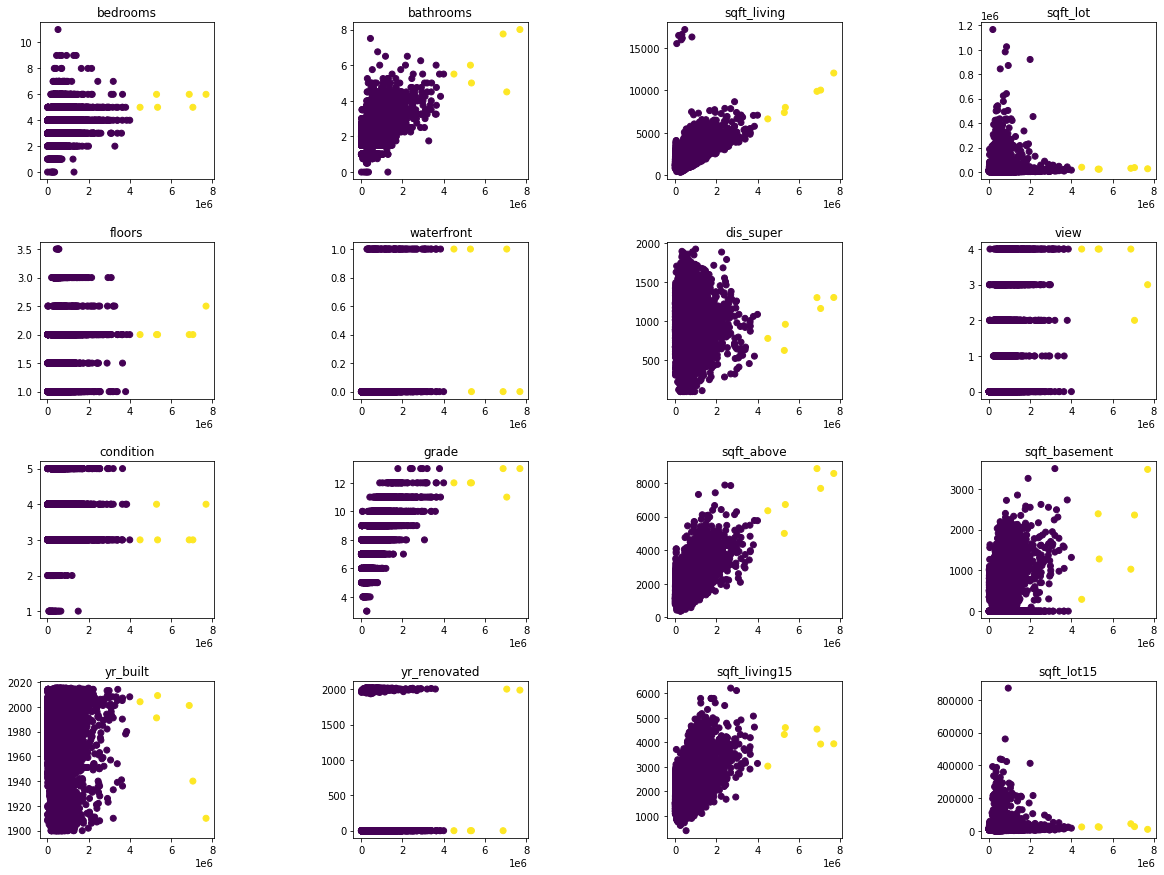

In [86]:
#Visuallisierung von Ausreißern
re_col=['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'dis_super', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15']
       

fig, ax = plt.subplots(4,4, figsize=(20,15))
fig.subplots_adjust(hspace = .4, wspace=0.8)
ax=ax.ravel()

df1 = df.dropna()

x=0
outlier_indice = []
for i in re_col:
       z_score_mask = df1.assign(outlier = np.logical_or(df1["price"] > df1["price"].mean() + df1["price"].std() * 10, df1["price"] < df1["price"].mean() - df1["price"].std() * 10)).outlier
       for e in z_score_mask[z_score_mask == True].index:
              if e not in outlier_indice:
                     outlier_indice.append(e)

       ax[x].scatter(df1["price"],df1[i],c=z_score_mask)
       ax[x].set_title(i)
       x+=1

print(f"Es wurden {blue(str(len(outlier_indice)))} Ausreißer gefunden. Sie sind auf den Graphen gelb dargestellt.\nFür die weiteren untersuchungen wurden sie entfernt.")
df = df.drop(index=outlier_indice)

## Missing Values

In [87]:
print(f'Folgende {red(len(df[df.isnull().any(axis=1)]))} Zeilen haben ausgewiesene MV')
df[df.isnull().any(axis=1)]

Folgende 3 Zeilen haben ausgewiesene MV


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,dis_super,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,ahf1,ahf2,ahf3
7163,20140909T000000,405000.0,3,1.75,1760,5355,1.0,NaN,NaN,NaN,...,NaN,0,98118,47.5368,-122.267,1790,6225,13.843391,109.343999,123.187390
10957,20150107T000000,406000.0,2,1.00,880,3000,1.0,NaN,NaN,NaN,...,NaN,0,98115,47.6749,-122.323,890,3000,50.170114,102.588214,152.758329
14780,20141107T000000,655000.0,3,1.00,1270,3600,1.5,NaN,NaN,NaN,...,NaN,0,98119,47.6368,-122.370,1710,3600,56.035650,121.245433,177.281083


In [88]:
#Löschen aller Zeilen mit MV
df=df.dropna()

## Noise

In [89]:
#Split DataSet into data and target
x = df.iloc[:,2:]
y = df.iloc[:,1]

In [90]:
#Regressions Modelle
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error

reg1 = GradientBoostingRegressor(random_state=1)
reg2 = BayesianRidge()
reg3 = DecisionTreeRegressor(max_depth=5, random_state=1)

reg1.fit(x,y)
reg2.fit(x,y)
reg3.fit(x,y)

ereg = VotingRegressor([('gb', reg1),('brr',  reg2),('dtr', reg3)]) #voting=hard

ereg.fit(x, y)

y_pred=cross_val_predict(ereg,x,y,cv=10)

Idee

Was macht VotingRegressor
Was macht cross_val_predict

### Beispiel Predictions der Modelle

In [91]:
xt = x[:20]
real = y[:20]
pred1 = reg1.predict(xt)
pred2 = reg2.predict(xt)
pred3 = reg3.predict(xt)
pred4 = ereg.predict(xt)
y_pred20 = y_pred[:20]

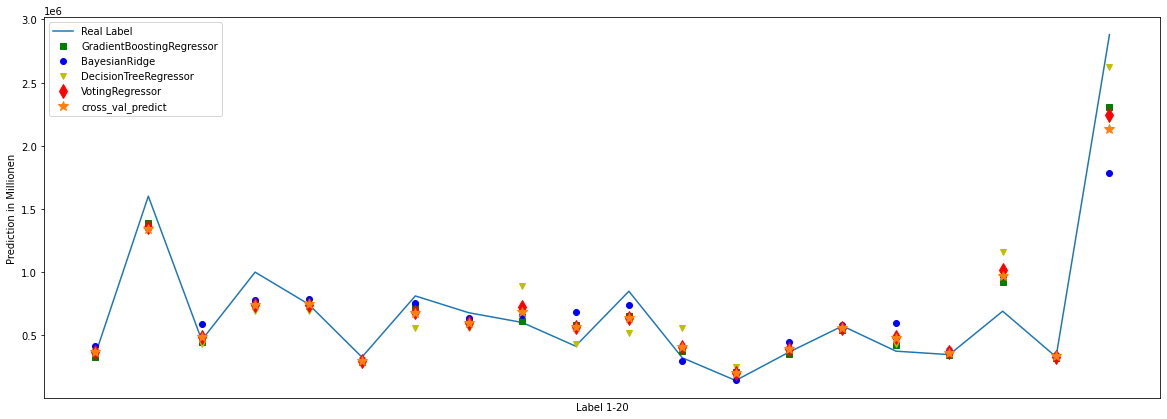

In [92]:
plt.figure(figsize=(20,7))
plt.plot(real, label="Real Label")
plt.plot(pred1, "gs", label="GradientBoostingRegressor")
plt.plot(pred2, "bo", label="BayesianRidge")
plt.plot(pred3, "yv", label="DecisionTreeRegressor")
plt.plot(pred4, "rd", ms=10, label="VotingRegressor")
plt.plot(y_pred20, "*", ms=10, label="cross_val_predict")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("Prediction in Millionen")
plt.xlabel("Label 1-20")
plt.legend(loc="best")


plt.show()

Was sieht man und wie unterscheiden sich die Punkte von den tatsächlichen Werten

### Noise Filter

In [93]:
mae=mean_absolute_error(y_pred,y)

x=0
for i,p in zip(y,y_pred):
    if p > i+mae*10:
        x+=1
    elif p < i-mae*10:
        x+=1      

print(x)          

49


Ein satz zu den gefundenen Punkten und mae*10 (s. Z-Score)

## Transformation

### A) Datum

In [94]:
df["date"] = pd.to_datetime(df["date"])
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,dis_super,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,ahf1,ahf2,ahf3
0,2014-07-08,336000.0,4,2.50,2530,8169,2.0,0.0,562.16,0.0,...,1993.0,0,98003,47.2634,-122.312,2220,8013,24.658459,108.183999,132.842458
1,2014-05-27,1600000.0,3,3.25,3790,19000,2.0,0.0,1462.74,4.0,...,1985.0,0,98177,47.7240,-122.373,2740,18628,18.682061,83.213016,101.895077
2,2015-04-17,460000.0,4,1.75,1870,8663,1.0,0.0,599.53,0.0,...,1949.0,0,98133,47.7366,-122.350,1560,7800,75.078050,101.082827,176.160876
3,2015-01-07,998500.0,3,1.75,2140,4800,2.0,0.0,970.84,0.0,...,1905.0,0,98112,47.6311,-122.312,2440,4800,49.367640,97.749706,147.117347
4,2014-07-14,745000.0,3,2.75,3010,12432,1.0,0.0,1157.55,0.0,...,1970.0,0,98052,47.6392,-122.108,2500,12432,43.343635,98.282451,141.626086


### B) Renovierung

In [95]:
renovated_yn= []
last_renovated=[]
df["year_sold"]=pd.DatetimeIndex(df['date']).year

for i in df.index:
    if df["yr_renovated"][i] != 0:
        renovated_yn.append(1)
        last_renovated.append(df["year_sold"][i]-df["yr_renovated"][i])
    else:
        renovated_yn.append(0)
        last_renovated.append(df["year_sold"][i]-df["yr_built"][i])

del df["year_sold"]
df["renovated_yn"] = renovated_yn
df["last_renovated"] = last_renovated
df.iloc[:,-2:]

,renovated_yn,last_renovated
0,0,21.0
1,0,29.0
2,0,66.0
3,0,110.0
4,0,44.0
...,...,...
14995,0,101.0
14996,0,20.0
14997,0,24.0
14998,0,11.0


Bringt nichts (s. Korrelation) Idee vorhanden 

### Normalisierung

Da nun alle auffälligen Ausreißer entfernt sind, eignet sich eine Min-Max-Normalisierung für den Datensatz.  
Diese sollte auf alle Features außer auf **date** und **price**, also das Label, angewandt werden.  

um eine Gruppierung der Daten zu vermeiden, bietet es sich noch an, das Feature **yr_renovated** zu bearbeiten, um die Lücke zwischen den 0-Werten und den tatsächlichen Jahreszahlen zu schließen.  
Dafür könnten die Werte > 0 an 0 herangezogen werden, indem man die kleinste Jahreszahl von allen Jahreszahlen abzieht und dann eine konstante mit alle Jahreszahlen addiert, um eine neue, kleinere Lücke zwischen den 0-Werten und den Jahreszahlen zu schaffen.  
  
Hier eine beispielhafte Formel in Python:  
    `df1.yr_renovated = df1.yr_renovated.apply(lambda x: x if x == 0 else x - df.yr_renovated[df.yr_renovated > 0].min() + 1)`

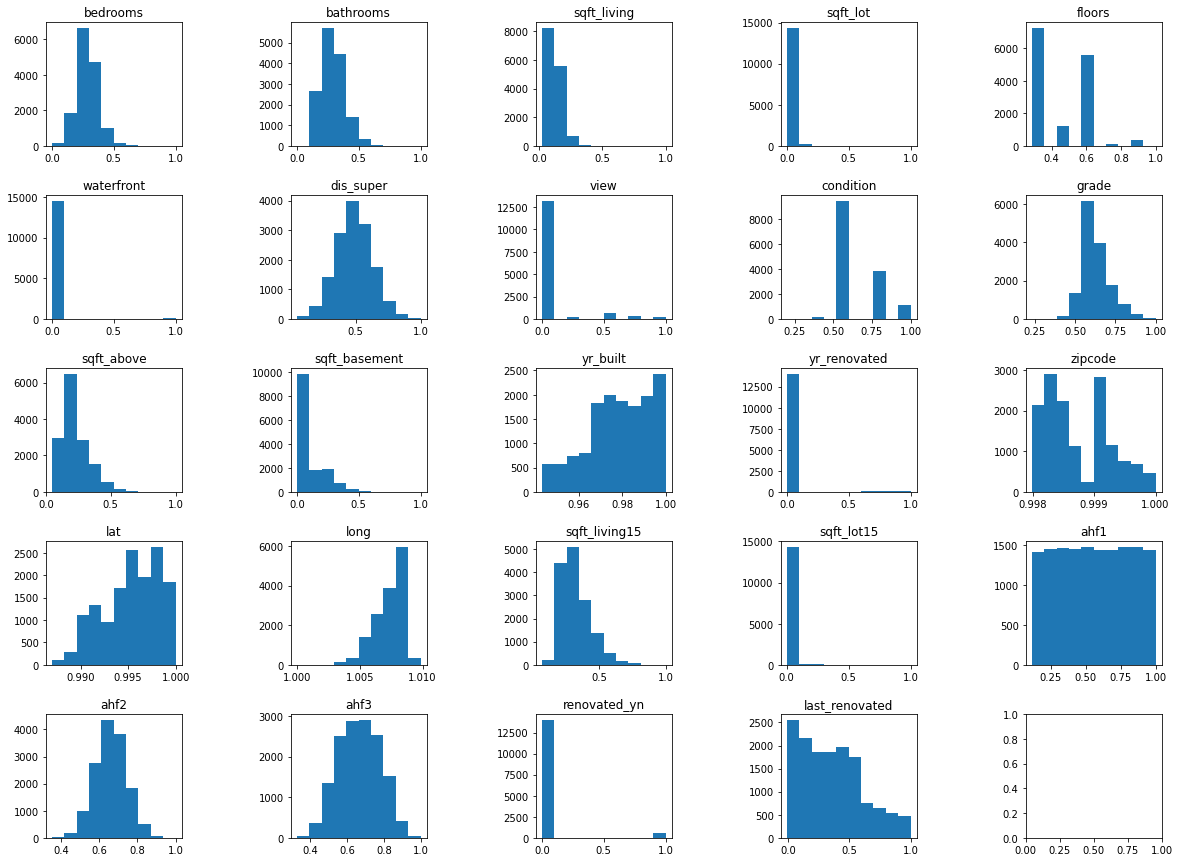

In [96]:
fig, ax = plt.subplots(5,5, figsize=(20,15))
fig.subplots_adjust(hspace = .4, wspace=0.8)
ax=ax.ravel()
df1 = df.dropna().drop(columns=["price", "date"])
min_renovation = np.sort(df1.yr_renovated.unique())[1]

df1.yr_renovated = df1.yr_renovated.apply(lambda x: x if x == 0 else x - min_renovation + 1)

x=0
for i in df1.columns:
    data = df1[i]
    data = data / data.max()
    ax[x].hist(data)
    ax[x].set_title(i)
    x+=1

s. To Do 

## Korrelation

### A) Korrelationen zum Preis

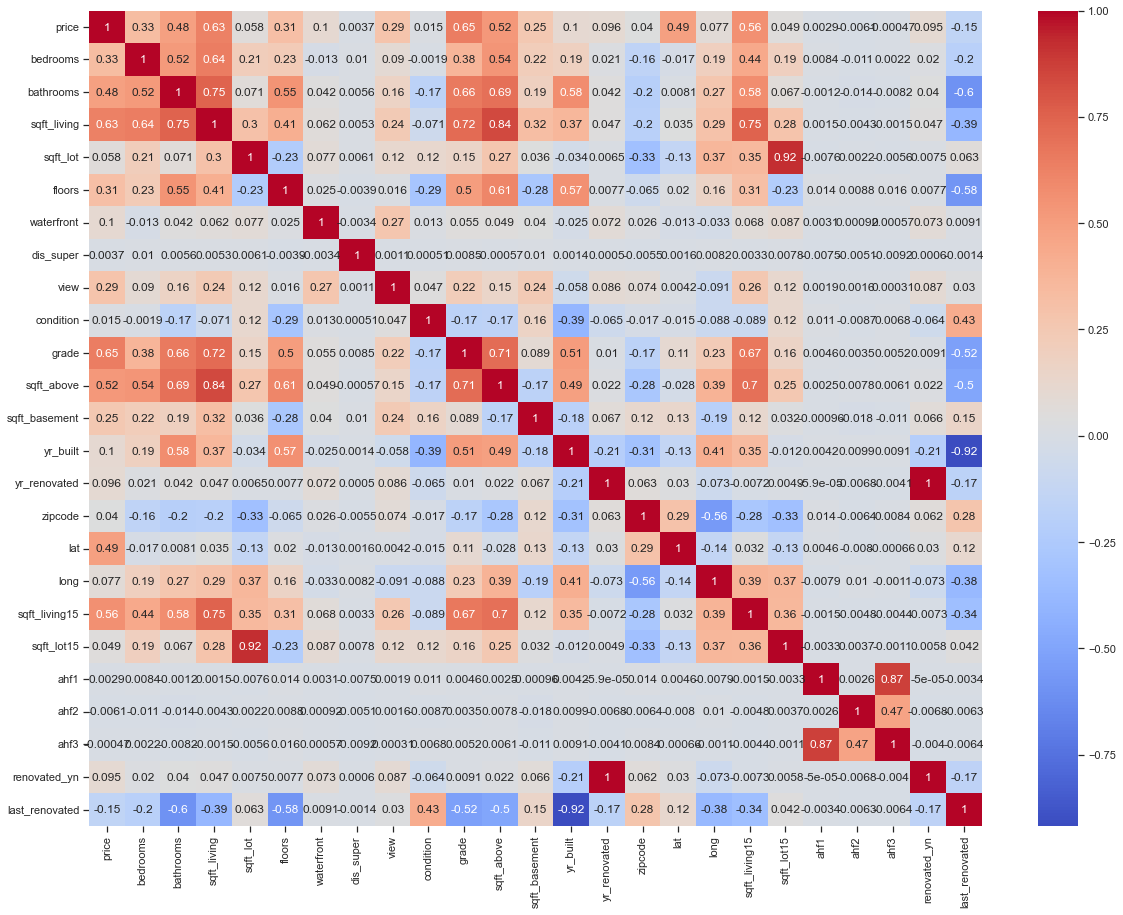

In [52]:
#data 
corr =df.corr(method="spearman")
#Größe der Heatmap
fig, ax = plt.subplots(figsize=(20,15))
#Colorpalette
cmap = sns.color_palette("coolwarm", as_cmap=True)
#Heatmap
sns.heatmap(ax=ax,data=corr,cmap=cmap, annot=True)
plt.show()

In [53]:
rel_features =[]
corr_fig = corr["price"]
ix = corr.sort_values('price', ascending=False).index
print("Relevante Korrelationen:")
for i in ix:
    if corr_fig[i]>= 0.3 or corr_fig[i]<=-0.3:
        rel_features.append(i)
        #Farben
        print("Die Korrelation von", i,"zum Preis:", round(corr_fig[i],3))

Relevante Korrelationen:
Die Korrelation von price zum Preis: 1.0
Die Korrelation von grade zum Preis: 0.647
Die Korrelation von sqft_living zum Preis: 0.628
Die Korrelation von sqft_living15 zum Preis: 0.563
Die Korrelation von sqft_above zum Preis: 0.523
Die Korrelation von lat zum Preis: 0.486
Die Korrelation von bathrooms zum Preis: 0.484
Die Korrelation von bedrooms zum Preis: 0.33
Die Korrelation von floors zum Preis: 0.313


Was sind relevante Features

### B) Korrelationen zwischen den Features

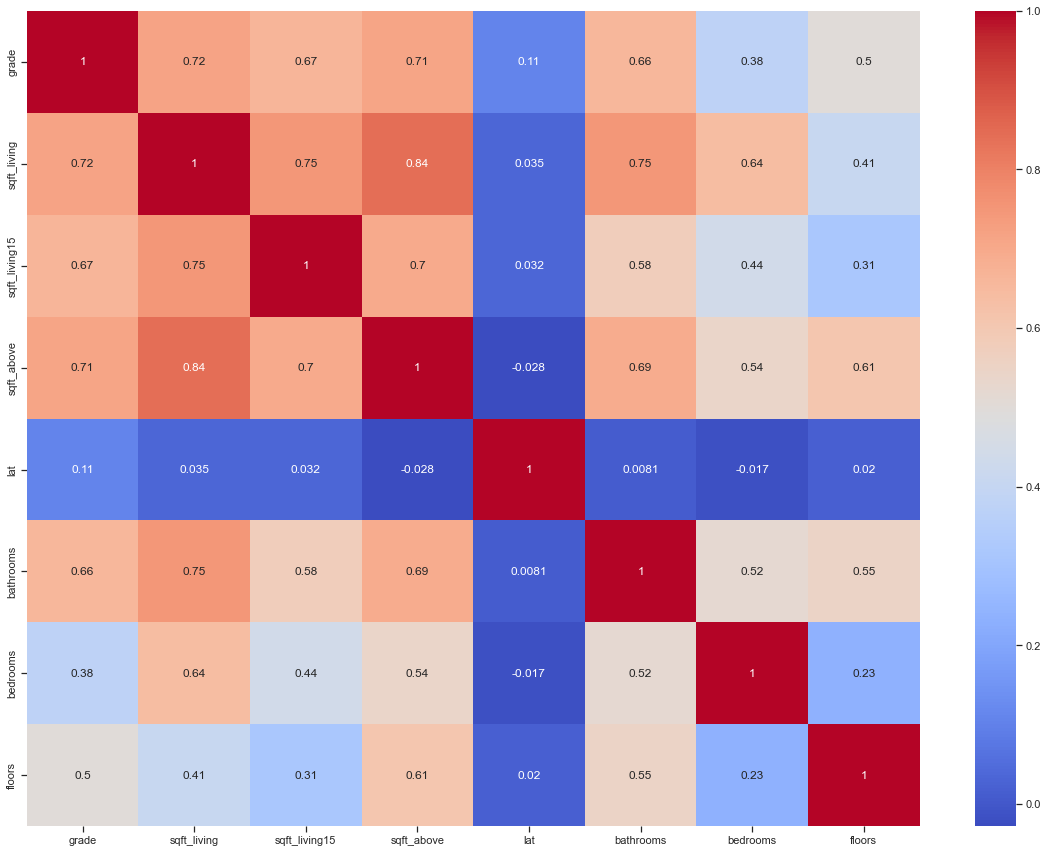

In [43]:
rel_features.remove("price")
corr_rel = corr.loc[rel_features,rel_features]
#Größe der Heatmap
fig, ax = plt.subplots(figsize=(20,15))
#Colorpalette
cmap = sns.color_palette("coolwarm", as_cmap=True)
#Heatmap
sns.heatmap(ax=ax,data=corr_rel,cmap=cmap, annot=True)
plt.show()

Korrelation zwischen den einzelnen Features, außer lat

### C) 

#### 1. PCA 
"Principal component analysis" für korreliernde Features

In [44]:
x1=df.loc[:,rel_features]

for num_components in range(1,5):
    pca = decomposition.PCA(n_components=num_components)
    pca.fit(x1)
    cumulative_variance= round(pca.explained_variance_ratio_.sum(),2)
    variance_per_pc=pca.explained_variance_ratio_
    print('Number of components: ',num_components,' Variance % explained: ',cumulative_variance,variance_per_pc)

Number of components:  1  Variance % explained:  0.85 [0.84757902]
Number of components:  2  Variance % explained:  0.93 [0.84757902 0.08718226]
Number of components:  3  Variance % explained:  1.0 [0.84757902 0.08718226 0.06523798]
Number of components:  4  Variance % explained:  1.0 [8.47579025e-01 8.71822557e-02 6.52379777e-02 2.87788871e-07]


In [30]:
#Beispiel
num_components=3

pca = decomposition.PCA(n_components=num_components)

pca.fit(x1)
x_tran = pca.transform(x1)
x_y= np.concatenate((x_tran.reshape(14559,num_components),df.loc[:,"price"].values.reshape(14559,1)),1)
df_PCA1 = pd.DataFrame(x_y,columns=['PC1','PC2','PC3','Label'])

df_PCA1.describe()

,PC1,PC2,PC3,Label
count,1.455900e+04,1.455900e+04,1.455900e+04,1.455900e+04
mean,-1.119065e-13,-1.445361e-13,-3.796980e-14,5.270408e+05
std,1.332628e+03,4.273983e+02,3.697166e+02,3.503276e+05
min,-2.396918e+03,-2.014893e+03,-2.459675e+03,1.000000e+04
25%,-9.595223e+02,-2.178565e+02,-2.107840e+02,3.149250e+05
50%,-3.067570e+02,2.588185e+00,-6.245817e+01,4.450000e+05
75%,6.774401e+02,1.799837e+02,1.975631e+02,6.375000e+05
max,1.064189e+04,9.537716e+03,5.601625e+03,4.000000e+06


#### 2. PCA 
"Principal component analysis" für alle Features

In [31]:
x2=df.iloc[:,2:]
for num_components in range(1,5):
    pca = decomposition.PCA(n_components=num_components)
    pca.fit(x2)
    cumulative_variance= round(pca.explained_variance_ratio_.sum(),2)
    variance_per_pc=pca.explained_variance_ratio_
    print('Number of components: ',num_components,' Variance % explained: ',cumulative_variance,variance_per_pc)

Number of components:  1  Variance % explained:  0.88 [0.87728669]
Number of components:  2  Variance % explained:  1.0 [0.87728669 0.12161627]
Number of components:  3  Variance % explained:  1.0 [8.77286689e-01 1.21616267e-01 7.69235098e-04]
Number of components:  4  Variance % explained:  1.0 [8.77286689e-01 1.21616267e-01 7.69235098e-04 1.32122286e-04]


## Visualisierung 2.0

### Geographische Lage

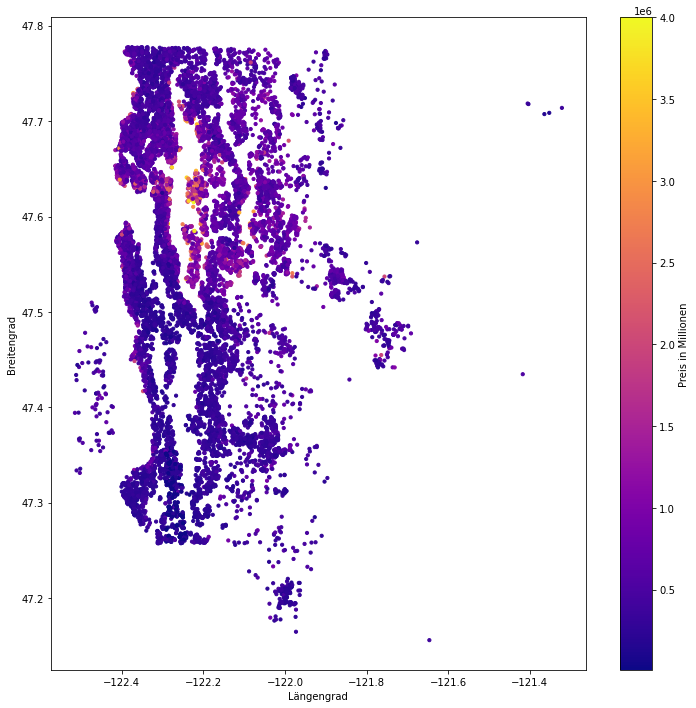

In [33]:
plt.figure(figsize=(12,12))
plt.scatter(df["long"], df["lat"], c=df["price"], cmap="plasma", s=10)
cbar = plt.colorbar()
cbar.set_label("Preis in Millionen")
plt.xlabel("Längengrad")
plt.ylabel("Breitengrad")
plt.show()

### Label & Features

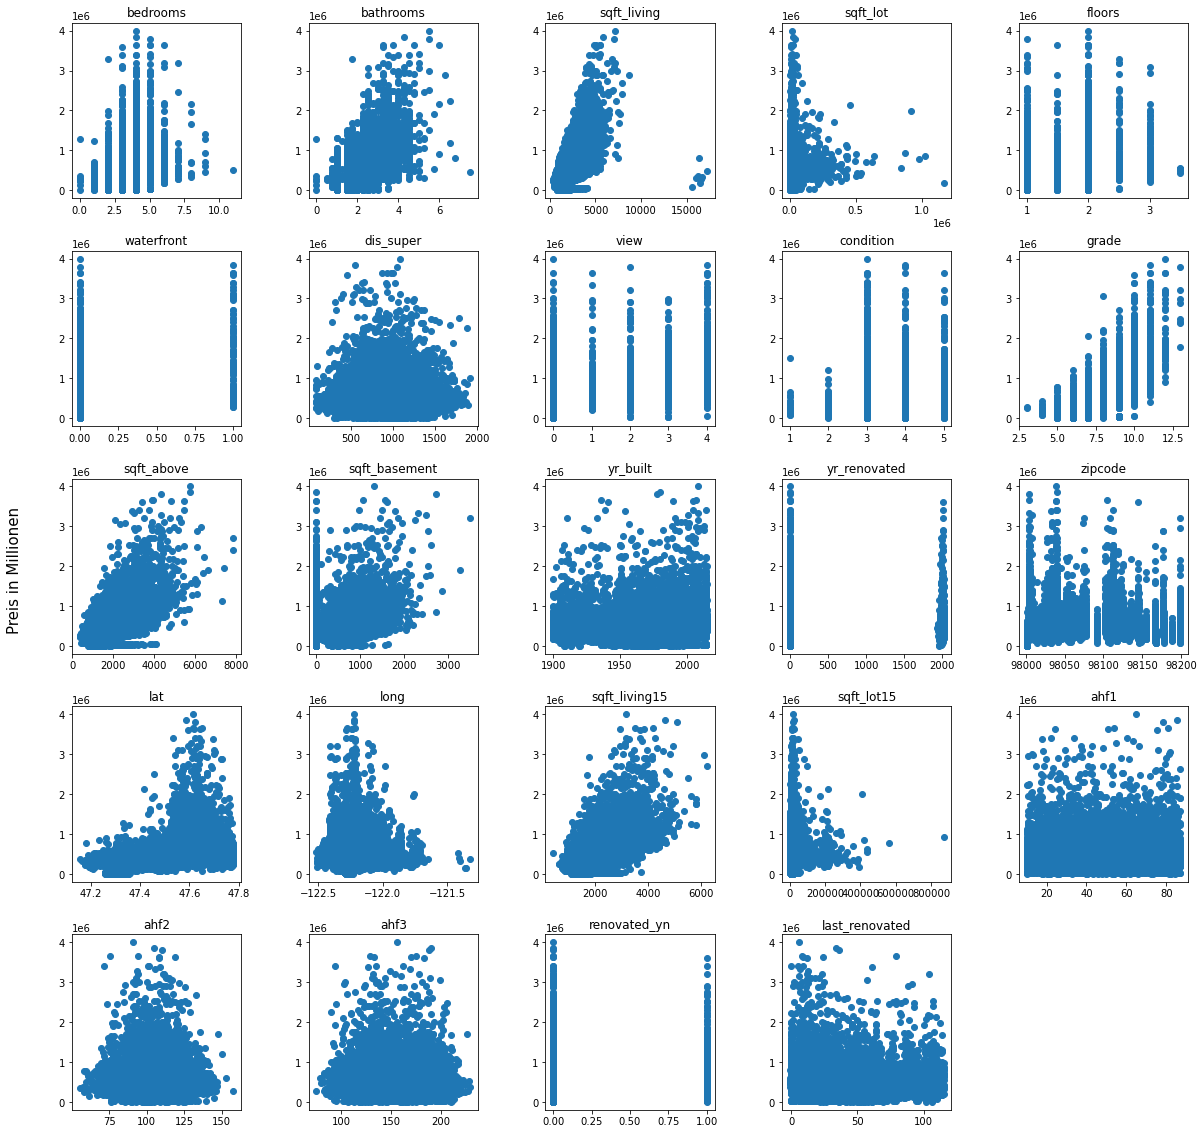

In [34]:
fig, axs=plt.subplots(5,5, figsize=(20,20))
#Y-Title
fig.text(0.08, 0.5, 'Preis in Millionen', va='center', rotation='vertical', fontsize=15)
#All Plots
for i,ax in zip(df.iloc[:,2:],axs.ravel()):
    ax.scatter(df[i],df["price"])
    ax.set_title(i)
#Don't show empty plots
axs[-1,-1].axis("off")
#Spacing
plt.subplots_adjust(wspace=0.4, hspace=0.3)

### PCA

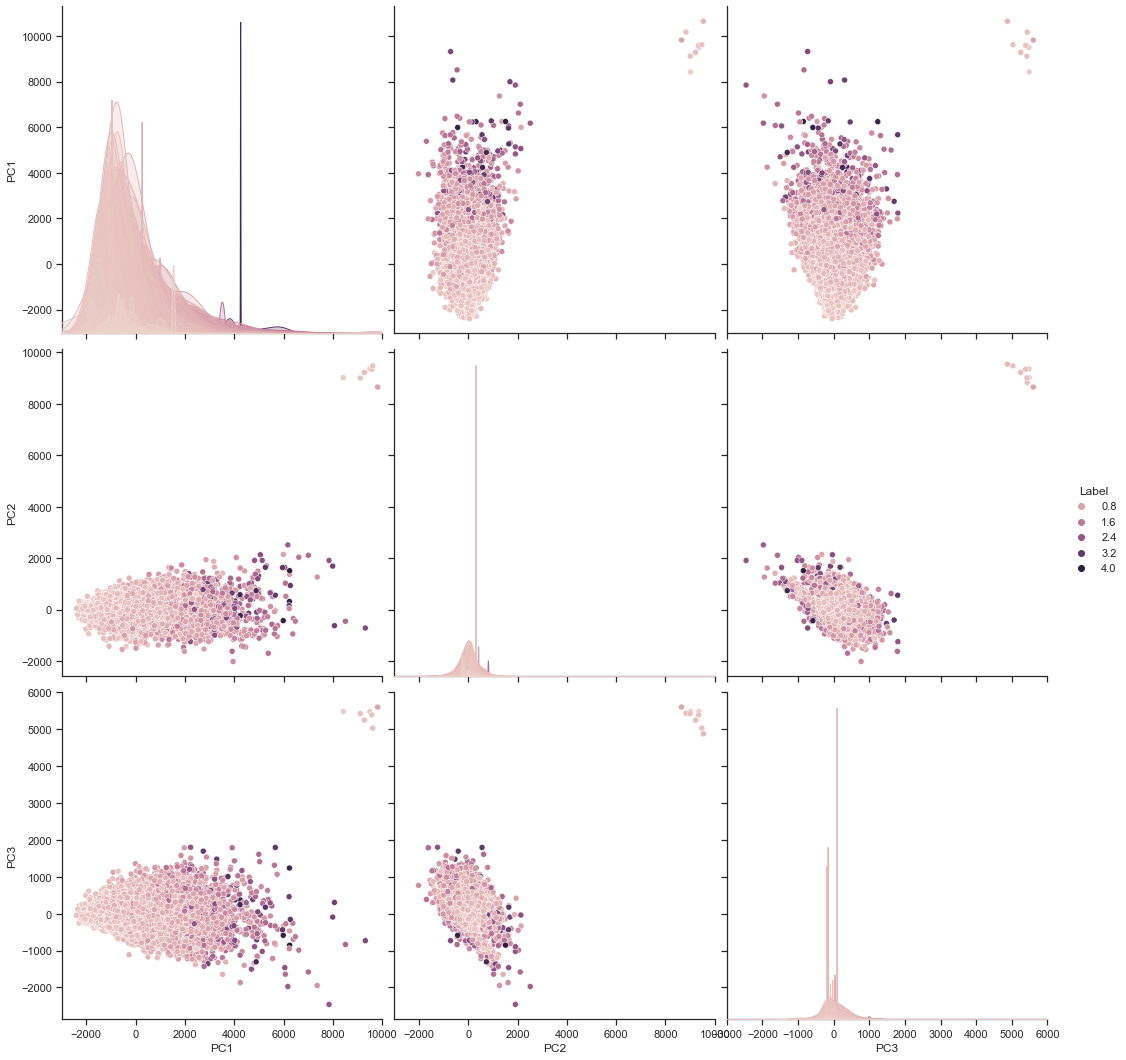

In [48]:
g = sns.pairplot(df_PCA1, hue="Label", height=5, aspect=1)
g.axes[0,0].set_xlim((-3000,10000))
g.axes[0,1].set_xlim((-3000,10000))
g.axes[0,2].set_xlim((-3000,6000))
sns.set(style="ticks")


# ToDo List

#### Ausreißer:

- Im Feature **price** sollten alle Zeilen mit den Werten **99999999.0** und **9999999.9** entfernt werden.
- Bei den **restlichen Features** sollten alle Zeilen mit einem **Z-Score** > 10 entfernt werden

#### Missing Values

- Der Datensatz erhalt 3 Zeilen mit NaN Werten, die entfernt werden sollten.

#### Noise

- Der Datensatz enthält bis zu 49 auffällige Zeilen (je nach vielfaches vom "mean_absolute_error" unterschiedlich), die entfernt werden sollten.

#### Transformation:

- Nach Entfernung der Ausreißer kann der Datensatz einer MinMax-Normalisierung unterzogen werden.
- Die Features **price** und **date** sollten dabei ausgenommen werden.
- Das Feature **yr_renovated** sollte vorher so bearbeitet werden, dass die Lücke zwischen dem Wert 0 und dem kleinsten tatsächlichen Jahr geschlossen wird. So z.B:  
    `df1.yr_renovated = df1.yr_renovated.apply(lambda x: x if x == 0 else x - df.yr_renovated[df.yr_renovated > 0].min() + 1)`

#### Feature Selection:

- Mit dem Label korrelieren bis zu 8 Features unterschiedlich Stark und sollte bei der Feature Selection berücksichtigt werden.
- Die meisten dieser Features korrelieren aber auch untereinander sehr stark, daher wäre eine "Principal component analysis" sinnvoll.
